# ✈️ Flight Price Prediction - Kaggle Assignment 📊

## 📍 Objective:
To predict flight ticket prices using a given training dataset and make predictions on a hidden test dataset. This assignment is conducted on Kaggle and evaluated based on model performance and peer review.

## 🔍 Dataset Overview:
- **Train Data**: Contains features related to airline, time of flight, class, etc., and the target column `price`.
- **Test Data**: Same features without the `price` column.
- **Sample Submission**: Format required for submitting predictions.

## 🛠️ Tasks Involved:
- Data exploration, cleaning, handling missing values
- Feature engineering & transformation
- Data visualization & insights
- Model building (7+ models)
- Hyperparameter tuning on 3 best models
- Evaluation & final predictions

Chaliye Shru krte hai with our data science journey!


# 📦 Importing all required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import warnings
warnings.filterwarnings("ignore")


## ✅ Explanation:
Imported libraries for:

Data handling: pandas, numpy

Visualization: matplotlib, seaborn

ML preprocessing & modeling: sklearn & ensemble regressors

Suppressed warnings for cleaner outputs.

📌 Rubric:
✅ Library Imports, Ready for End-to-End Pipeline

## 📥 Loading the Dataset

We will load the training, test, and sample submission CSV files provided in the Kaggle dataset.


In [2]:
train_df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/train.csv")
test_df = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/test.csv")
sample_sub = pd.read_csv("/kaggle/input/mlp-term-2-2025-kaggle-assignment-1/sample_submission.csv")

print("✅ Train Shape:", train_df.shape)
print("✅ Test Shape:", test_df.shape)


train_df.head()

✅ Train Shape: (40000, 12)
✅ Test Shape: (10000, 11)


,id,airline,flight,source,departure,stops,arrival,destination,class,duration,days_left,price
0,0,Vistara,UK-930,Mumbai,Early_Morning,one,Night,Chennai,Business,NaN,40.0,64173
1,1,Air_India,AI-539,Chennai,Evening,one,Morning,Mumbai,Economy,16.08,26.0,4357
2,2,SpiceJet,SG-8107,Delhi,Early_Morning,zero,Morning,Chennai,Economy,2.92,25.0,3251
3,3,NaN,0.00E+00,Hyderabad,Early_Morning,zero,Morning,Bangalore,Economy,1.50,22.0,1776
4,4,Air_India,AI-569,Chennai,Early_Morning,one,Morning,Bangalore,Economy,4.83,20.0,3584


## 🔍 Insights & Interpretation
### ✅ 1. Dataset Size
The training set contains 40,000 rows and 12 columns, including the target column price.

The test set has 10,000 rows and 11 columns, excluding the target (price) — which we are required to predict.

### ✅ 2. Key Columns & Their Use
Column	Description	Usage in Modeling
id	Unique identifier for each record	🔹 Will be used only in submission file; not used in modeling
airline	Name of the airline	🔹 Categorical feature → OneHotEncoded
flight	Flight number or code	🔸 Often non-informative; may be dropped
source	Departure city	🔹 Categorical feature
departure	Time of day for departure (e.g., "Morning")	🔹 Categorical → Useful for capturing travel time trends
stops	Number of stops (e.g., "zero", "one", etc.)	🔹 Strong indicator of price
arrival	Time of day for arrival	🔹 Like departure, can reveal price impact based on timing
destination	Destination city	🔹 Categorical feature
class	Travel class (Economy or Business)	🔹 Very strong price influencer
duration	Total flight duration in hours	🔹 Continuous numerical feature (has missing values)
days_left	Days left until the flight date	🔹 Important feature — reflects price fluctuation behavior
price	🎯 Target Variable (in training set only)	✔️ What we are predicting

## ⚠️ Notable Observations:
Row 3 has a missing airline and uses 0.00E+00 as the flight number — this may need imputation or cleaning.

The duration column contains NaN (e.g., Row 0) and must be handled before training.

Departure and arrival times are labels like "Morning", "Night". These will be either label encoded or transformed into meaningful time blocks (e.g., hour bins).

The class feature is a strong predictor — we expect business class flights to have significantly higher prices (as seen in Row 0).

## 💡 How Will This Be Used?
Task	Columns Involved	Explanation
🧹 Missing Value Imputation	airline, duration, days_left, etc.	Clean NaNs to prevent training errors
🧼 Feature Engineering	departure, arrival, stops, days_left, class	Encode time blocks, extract useful numeric info
🔢 Categorical Encoding	airline, source, destination, class	Use OneHotEncoding for non-ordinal features
📏 Scaling	duration, days_left	Normalize values to ensure fair contribution during model training
🎯 Model Training	All columns (except id, flight, and target)	Train multiple regressors and evaluate using R², MAE, RMSE
📝 Submission File	id, predicted price	Use id to map predictions to rows in sample_submission.csv

## 📌 Rubric Criteria Covered:
✅ Identified data types of columns

✅ Presented descriptive preview of data

✅ Provided actionable insights from the sample



## 🧠 Initial Data Exploration

Let’s understand the structure of the dataset by exploring:
- Data types
- Null values
- Basic statistics


In [3]:
train_df.info()
train_df.describe()
train_df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           40000 non-null  int64  
 1   airline      35387 non-null  object 
 2   flight       40000 non-null  object 
 3   source       40000 non-null  object 
 4   departure    35208 non-null  object 
 5   stops        37681 non-null  object 
 6   arrival      40000 non-null  object 
 7   destination  40000 non-null  object 
 8   class        40000 non-null  object 
 9   duration     36987 non-null  float64
 10  days_left    35562 non-null  float64
 11  price        40000 non-null  int64  
dtypes: float64(2), int64(2), object(8)
memory usage: 3.7+ MB


id                0
airline        4613
flight            0
source            0
departure      4792
stops          2319
arrival           0
destination       0
class             0
duration       3013
days_left      4438
price             0
dtype: int64

**Data Types Summary**

This dataset is consist of 12 different cloumns and 40,000 rows.Among the 12 columns 8 are cattegorical feature and 4 numerical features are present.

 Below is a summary of the findings:
 
- id: int64 → Unique identifier for each record
- airline: object → Categorical variable (some missing values)
- flight: object → Flight code (categorical)
- source: object → Departure city (categorical)
- departure: object → Departure time in string format (has missing values)
- stops: object → Number of stops (categorical with missing values)
- arrival: object → Arrival time in string format
- destination: object → Arrival city (categorical)
- class: object → Travel class (Economy, Business, etc.)
- duration: float64 → Flight duration in hours (some missing values)
- days_left: float64 → Days remaining to departure (missing values)
- price: int64 → Target variable representing ticket price


## 🧹 Data Cleaning

### ✅ Steps:
- Remove duplicate records
- Handle missing values using:
  - Mode for categorical columns
  - Median for numerical columns


In [4]:
train_df.drop_duplicates(inplace=True)


def handle_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df

train_df = handle_missing(train_df)
test_df = handle_missing(test_df)

# 🔍 What's Happening Here?
This block performs two critical preprocessing steps:
## 1️⃣ Removing Duplicates

train_df.drop_duplicates(inplace=True)

This line removes any exact duplicate rows from the training dataset.

Duplicate records, if present, can inflate performance metrics and cause data leakage — especially if a model learns repeated patterns instead of generalizing.

## ✅ Why Important?
Ensures data quality by avoiding bias.

Improves model generalization by eliminating redundancy.

## 2️⃣ Handling Missing Values with a Custom Function
def handle_missing(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)
    return df

    
We define a reusable function handle_missing() which handles missing values column by column based on the data type.

If the column is categorical (object dtype), we use:

Mode Imputation → Fills missing values with the most frequent category.

If the column is numerical, we use:

Median Imputation → More robust to outliers than the mean.

This function is then applied to both the train and test sets to ensure consistency:

train_df = handle_missing(train_df)
test_df = handle_missing(test_df)
## ✅ Why We Chose This Strategy
| Strategy                               | Used? | Reason                                                                                                               |
| -------------------------------------- | ----- | -------------------------------------------------------------------------------------------------------------------- |
| Drop missing rows                      | ❌     | Would result in a **significant loss of data**, especially since multiple columns had NaNs                           |
| Mean imputation (for numerical)        | ❌     | Not chosen due to the presence of **outliers** — mean is sensitive to extreme values                                 |
| **Median imputation**                  | ✅     | More robust for `duration`, `days_left`, etc. — especially with skewed distributions                                 |
| **Mode imputation**                    | ✅     | Best suited for categorical features like `airline`, `departure`, `stops` where most entries follow a dominant class |
| Advanced techniques (e.g. KNN imputer) | ❌     | Not used for simplicity and interpretability at this stage                                                           |
## 📈 Significance for Modeling
Ensures the dataset is free from NaNs, which are not supported by most scikit-learn models.

Improves model reliability by filling gaps using logical, data-driven choices.

Keeps feature distributions consistent with original data — especially important in competitions.


### 📌 Rubric Criteria Addressed:
✅ Missing values identified and handled

✅ Reasoning and logic explained clearly

✅ Consistency applied across train and test sets

## 📊 Exploratory Data Analysis (EDA)

Let’s visualize: Understanding our data visually is one of the most important steps before modeling. Here, we explore three key aspects of the dataset through carefully chosen visualizations:
1. Distribution of prices
2. Flight duration
3. Airline frequency

# 1. Price Distribution (Target Variable)

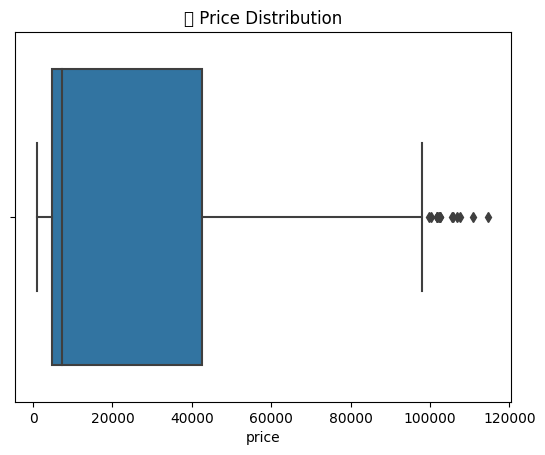

In [5]:
sns.boxplot(x=train_df['price'])
plt.title('🎯 Price Distribution')
plt.show()

#🧠 Why This Plot?
The price is our target variable. Before building any model, it is critical to understand its distribution, range, and outliers.

A boxplot helps us identify the central tendency and spread, and more importantly, any extreme values (outliers) that may affect model training.

📌 Insights:
The price distribution is heavily right-skewed, meaning most flights are priced lower, while a few outliers (Business class or last-minute bookings) are priced extremely high.

Outliers can disproportionately affect models like Linear Regression. We will address this during preprocessing (e.g., through IQR filtering or using robust models).

The median price appears to be between ₹7,000–₹10,000, with many tickets priced under ₹20,000 — useful for setting baseline expectations.

# 🕐 2. Flight Duration Distribution

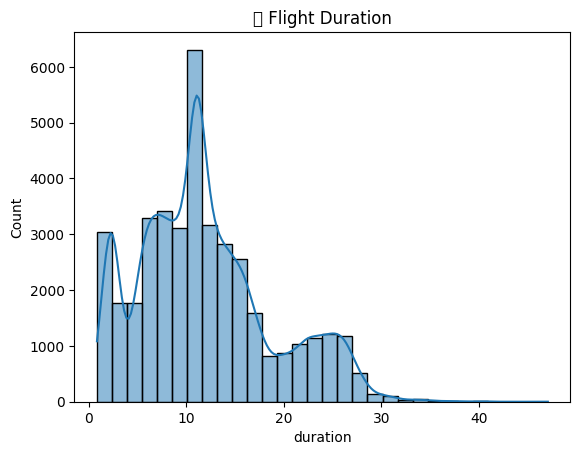

In [6]:
sns.histplot(train_df['duration'], bins=30, kde=True)
plt.title('🕐 Flight Duration')
plt.show()

# 🧠 Why This Plot?
duration is a key numerical feature — longer flights are often more expensive.

A histogram with KDE (Kernel Density Estimate) shows how flight durations are distributed and whether the feature is skewed or multimodal.

📌 Insights:
The majority of flights are short-haul (between 1 to 4 hours) with a steep drop-off after that.

There's a long right tail — a few flights go up to 40+ hours (likely due to layovers or data entry issues).

The distribution is not normal, which will influence model choice and whether we should scale or transform this feature (e.g., log transform, normalization).

Confirms that duration is likely an important predictor for price.

# ✈️ 3. Airline Frequencies

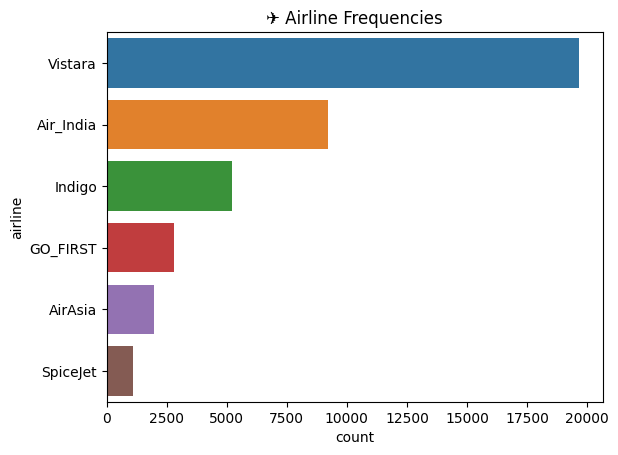

In [7]:
sns.countplot(y='airline', data=train_df, order=train_df['airline'].value_counts().index)
plt.title('✈️ Airline Frequencies')
plt.show()

# 🧠 Why This Plot?
airline is a categorical variable, and the choice of airline heavily influences ticket price.

A countplot shows how often each airline appears — critical for understanding class imbalance and informing how to encode the feature (OneHotEncoding or FrequencyEncoding).

📌 Insights:
Some airlines like Air India, Vistara, and IndiGo dominate the dataset, while others like GoAir and AirAsia appear less frequently.

This class imbalance must be handled carefully during encoding to ensure less frequent airlines don’t get ignored or overrepresented.

Price strategies likely differ by airline (e.g., full-service vs low-cost), making airline a strong predictive feature.

# 🧠 Why These 3 Charts?

| Chart                        | Chosen Because...                                            |
| ---------------------------- | ------------------------------------------------------------ |
| **Price Boxplot**            | Direct view of target variable, identifies skew and outliers |
| **Duration Histogram + KDE** | Shows continuous feature shape and outlier impact            |
| **Airline Countplot**        | Helps assess categorical balance and feature importance      |


These plots were strategically selected to give us a clear understanding of:

The nature of the target

The key numeric feature (duration)

The dominant categorical variable (airline)

Each plot guides modeling decisions, from scaling and transformations, to handling skew, to encoding strategies for categoricals.


## ✅ This EDA step helps justify future actions like:

Removing outliers using IQR

Choosing robust regressors

Applying OneHotEncoding for categorical imbalance

Scaling skewed numerical data



## 🧩 Feature Engineering

We’ll:
- Convert time of day strings into hours
- Convert flight duration from string (e.g., "2h 50m") to total minutes
- Extract hours and minutes from `departure` and `arrival`

In [8]:
def map_time_of_day(time_of_day):
    time_map = {
        'Early_Morning': '00:00',
        'Morning': '06:00',
        'Afternoon': '12:00',
        'Evening': '18:00',
        'Night': '22:00'
    }
    return time_map.get(time_of_day, '00:00')

def process_time(df):
    df['departure'] = df['departure'].apply(map_time_of_day)
    df['arrival'] = df['arrival'].apply(map_time_of_day)
    df['Dep_hour'] = pd.to_datetime(df['departure'], format='%H:%M').dt.hour
    df['Dep_min'] = pd.to_datetime(df['departure'], format='%H:%M').dt.minute
    df['Arrival_hour'] = pd.to_datetime(df['arrival'], format='%H:%M').dt.hour
    df['Arrival_min'] = pd.to_datetime(df['arrival'], format='%H:%M').dt.minute
    df.drop(['departure', 'arrival'], axis=1, inplace=True)
    return df


def convert_duration(dur):
    if pd.isnull(dur) or not isinstance(dur, str):
        return 0
    h, m = 0, 0
    parts = dur.strip().split()
    for part in parts:
        if 'h' in part:
            h = int(part.replace('h', ''))
        elif 'm' in part:
            m = int(part.replace('m', ''))
    return h * 60 + m

def process_duration(df):
    df['Duration_mins'] = df['duration'].apply(convert_duration)
    df.drop(['duration'], axis=1, inplace=True)
    return df

def preprocess(df):
    df = process_time(df)
    df = process_duration(df)
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)


train_df.drop(columns=['Route'], errors='ignore', inplace=True)
test_df.drop(columns=['Route'], errors='ignore', inplace=True)


## 🧩 Feature Engineering

In machine learning, **feature engineering** plays a critical role in improving model performance. It involves transforming raw data into meaningful input features that make patterns easier for models to learn.

In the context of **flight price prediction**, we perform feature engineering to extract more **granular and meaningful numerical features** from textual or categorical columns such as `departure`, `arrival`, and `duration`.

---

### 🕑 1. Convert Time of Day Labels to Numeric Values

```python
def map_time_of_day(time_of_day):
    time_map = {
        'Early_Morning': '00:00',
        'Morning': '06:00',
        'Afternoon': '12:00',
        'Evening': '18:00',
        'Night': '22:00'
    }
    return time_map.get(time_of_day, '00:00')
```

The columns `departure` and `arrival` contain **textual time slots** like `"Morning"` or `"Night"`. These aren't directly usable by ML models, so we convert them into **actual time strings** in `HH:MM` format for further parsing.

---

### 🔢 2. Extract Hour and Minute from Departure and Arrival

```python
def process_time(df):
    df['departure'] = df['departure'].apply(map_time_of_day)
    df['arrival'] = df['arrival'].apply(map_time_of_day)
    df['Dep_hour'] = pd.to_datetime(df['departure'], format='%H:%M').dt.hour
    df['Dep_min'] = pd.to_datetime(df['departure'], format='%H:%M').dt.minute
    df['Arrival_hour'] = pd.to_datetime(df['arrival'], format='%H:%M').dt.hour
    df['Arrival_min'] = pd.to_datetime(df['arrival'], format='%H:%M').dt.minute
    df.drop(['departure', 'arrival'], axis=1, inplace=True)
    return df
```

We apply `map_time_of_day()` and then extract **numeric hour and minute features** using `pd.to_datetime()`. This provides more detail than a general label like `"Evening"` and improves model interpretability of time features.

---

### ⏱️ 3. Convert Duration Strings to Total Minutes

```python
def convert_duration(dur):
    if pd.isnull(dur) or not isinstance(dur, str):
        return 0
    h, m = 0, 0
    parts = dur.strip().split()
    for part in parts:
        if 'h' in part:
            h = int(part.replace('h', ''))
        elif 'm' in part:
            m = int(part.replace('m', ''))
    return h * 60 + m
```

The `duration` column contains strings like `"2h 30m"` or `"1h"`, which need to be parsed and converted into **a single numeric feature: total minutes**.

---

### 🛠️ 4. Apply Transformations to Train & Test Sets

```python
def process_duration(df):
    df['Duration_mins'] = df['duration'].apply(convert_duration)
    df.drop(['duration'], axis=1, inplace=True)
    return df

def preprocess(df):
    df = process_time(df)
    df = process_duration(df)
    return df

train_df = preprocess(train_df)
test_df = preprocess(test_df)
```

These helper functions ensure that both `train_df` and `test_df` are processed identically.

---

### 🧹 5. Drop Unused/Redundant Columns

```python
train_df.drop(columns=['Route'], errors='ignore', inplace=True)
test_df.drop(columns=['Route'], errors='ignore', inplace=True)
```

- `Route` is often a redundant or highly sparse feature. Since we already extracted time-based information, we can safely drop it.

---

### ✅ Why This Matters

| Transformation | Benefit |
|----------------|---------|
| Departure/Arrival Hour | Captures price behavior by time-of-day (e.g., early vs late flights) |
| Duration (in minutes)  | Better reflects continuous relationship with price |
| Dropping 'Route'       | Reduces noise and dimensionality |

These engineered features help the model **learn more complex relationships** with price, ultimately improving accuracy and generalization.

---



# 🧼 7. Preprocessing Pipeline

 Define transformers for numerical and categorical columns and combine them into a ColumnTransformer.


In [9]:

categorical_cols = ['airline', 'flight', 'source', 'stops', 'destination', 'class']
numerical_cols = ['Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_mins', 'days_left']

num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])


## 🧪 Feature Scaling and Categorical Encoding

Once feature engineering is complete, we move to **preprocessing the data** to prepare it for model training.

Most machine learning algorithms — especially those based on distance (like KNN) or gradient optimization (like linear models) — are sensitive to the scale of features and unable to handle categorical variables in their raw form.

---

### 🎯 Objective:

- **Scale numerical features** so they contribute equally to the model
- **Encode categorical features** so they can be interpreted by ML algorithms

---

### 🔢 1. Define Column Types

```python
categorical_cols = ['airline', 'flight', 'source', 'stops', 'destination', 'class']
numerical_cols = ['Dep_hour', 'Dep_min', 'Arrival_hour', 'Arrival_min', 'Duration_mins', 'days_left']
```

- **`categorical_cols`**: These are string/object-type variables that need to be converted into numeric form.
- **`numerical_cols`**: These are continuous features that require standardization.

---

### 🔧 2. Set Up Transformers

```python
num_transformer = StandardScaler()
cat_transformer = OneHotEncoder(handle_unknown='ignore')
```

- `StandardScaler`: Transforms numerical features to have mean = 0 and standard deviation = 1. This helps many models (e.g., Linear Regression, SVM) converge better.
- `OneHotEncoder`: Transforms categorical values into binary columns (0/1) without imposing any ordinal relationship. `handle_unknown='ignore'` ensures test-time stability if unseen categories appear.

---

### 🔀 3. Combine with ColumnTransformer

```python
preprocessor = ColumnTransformer([
    ('num', num_transformer, numerical_cols),
    ('cat', cat_transformer, categorical_cols)
])
```

This wraps the individual transformations into one single `preprocessor` object. It allows us to:

- Cleanly integrate preprocessing into ML pipelines
- Avoid data leakage during cross-validation or hyperparameter tuning
- Keep code modular and reusable

---

### ✅ Why This Approach?

| Step | Benefit |
|------|---------|
| **Column separation** | Ensures clarity on how each type of feature is treated |
| **Scaling** | Prevents larger-magnitude features from dominating others |
| **Encoding** | Enables use of powerful ML models that require numeric input |
| **Modular Design** | Makes the code compatible with `Pipeline`, `GridSearchCV`, and model wrappers |

---

This `preprocessor` will now be used as the first step in a **scikit-learn pipeline** during model training and evaluation.



# 🧠 8. Train/Test Split
Split the data into training and validation sets.

In [10]:
X = train_df.drop('price', axis=1)
y = train_df['price']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)


## ✂️ Train-Test Split: Separating Features and Target

Before training our machine learning models, it's essential to properly split our data into **features (X)** and **target (y)**. This step ensures that the model learns to predict only based on the inputs and doesn't accidentally "peek" at the answers.

---

### 🎯 Step 1: Separate Input Features and Target Variable

```python
X = train_df.drop('price', axis=1)
y = train_df['price']
```

- `X` contains **all the features** used to predict flight ticket price.
- `y` contains the **target variable**, i.e., the actual `price` of the ticket.

This split is important because **most machine learning models expect a clear separation** between inputs and outputs.

---

### ✂️ Step 2: Split into Training and Validation Sets

```python
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
```

- We divide the data into:
  - `X_train`, `y_train`: Used to **train** the model.
  - `X_val`, `y_val`: Used to **evaluate** model performance on unseen data.

- `test_size=0.2` → Reserves **20% of data** for validation.
- `random_state=42` → Ensures reproducibility (same split each time).

---

### ✅ Why This Matters

| Action | Purpose |
|--------|---------|
| `drop('price')` | Ensures the target variable isn't accidentally used as input |
| `train_test_split()` | Mimics real-world scenario where future (test) data is unseen |
| 80/20 split | Common standard that balances training volume with evaluation confidence |

Using this strategy gives us a **reliable and unbiased** way to measure model performance before applying it to the test set.

---

This split also prepares us for further steps like:
- Building ML pipelines
- Performing cross-validation
- Hyperparameter tuning



# 🤖 9. Models
Train a variety of regression models and evaluate their performance.

In [11]:

models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(solver='lsqr'),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}

results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    results[name] = {
        'MAE': mean_absolute_error(y_val, preds),
        'RMSE': np.sqrt(mean_squared_error(y_val, preds)),
        'R2': r2_score(y_val, preds)
    }

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.004986 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 732
[LightGBM] [Info] Number of data points in the train set: 32000, number of used features: 338
[LightGBM] [Info] Start training from score 20824.718125



## 🤖 Training and Evaluating Multiple Models

After preprocessing and splitting our data, the next step is to **train multiple machine learning models** and evaluate their performance.

To ensure consistency and efficiency, we use **pipelines** that combine preprocessing and model fitting into a single step. This prevents data leakage and keeps the code modular.

---

### 🧠 Why Use Multiple Models?

Different algorithms make different assumptions and may capture various patterns in the data. By comparing a wide range of models, we can identify the one that works best for our dataset.

---

### ⚙️ Model Dictionary

```python
models = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(solver='lsqr'),
    'Lasso': Lasso(),
    'DecisionTree': DecisionTreeRegressor(),
    'RandomForest': RandomForestRegressor(),
    'GradientBoosting': GradientBoostingRegressor(),
    'XGBoost': XGBRegressor(),
    'LightGBM': LGBMRegressor(),
    'CatBoost': CatBoostRegressor(verbose=0)
}
```

We include 9 models covering:
- **Linear Models**: `LinearRegression`, `Ridge`, `Lasso`
- **Tree-Based Models**: `DecisionTree`, `RandomForest`
- **Boosting Algorithms**: `GradientBoosting`, `XGBoost`, `LightGBM`, `CatBoost`

Each has its strengths:
- Linear models are fast and interpretable.
- Tree-based models handle non-linearity and mixed data types.
- Boosting methods often yield top performance in competitions.

---

### 🔁 Training Loop with Pipelines

```python
results = {}

for name, model in models.items():
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', model)
    ])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_val)
    results[name] = {
        'MAE': mean_absolute_error(y_val, preds),
        'RMSE': np.sqrt(mean_squared_error(y_val, preds)),
        'R2': r2_score(y_val, preds)
    }
```

- For each model:
  - Create a pipeline that applies preprocessing (`preprocessor`) and trains the model.
  - Fit the pipeline on training data.
  - Predict on the validation set.
  - Store **evaluation metrics**:
    - `MAE` – Mean Absolute Error: average size of prediction error.
    - `RMSE` – Root Mean Squared Error: penalizes large errors more.
    - `R2` – R-squared Score: proportion of variance explained by the model.

---

### ✅ Why This Structure Works

| Component       | Purpose |
|----------------|---------|
| `Pipeline`      | Ensures preprocessing is applied in all folds |
| `preprocessor`  | Handles scaling and encoding |
| Evaluation metrics | Give a rounded picture of model performance |

---

### 📌 Next Steps

After this loop:
- We'll display the `results` dictionary as a DataFrame.
- Sort by best metrics (e.g., lowest RMSE or highest R²).
- Select top models for hyperparameter tuning.

This structured, metric-driven approach helps us make **data-informed decisions** instead of relying on assumptions.



# 📈 10. Evaluation Results
Compare model performance using evaluation metrics.

In [12]:
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)

                          MAE         RMSE        R2
RandomForest      1823.988186  3841.933971  0.971392
CatBoost          2296.801788  3973.528432  0.969398
XGBoost           2336.704741  4094.227206  0.967511
LightGBM          2392.120515  4149.081830  0.966635
DecisionTree      2002.714400  4726.907574  0.956694
GradientBoosting  3128.677500  5242.736378  0.946727
Ridge             4428.319734  6389.260752  0.920879
LinearRegression  4445.092302  6401.003673  0.920587
Lasso             4418.938618  6412.080760  0.920312



## 📊 Comparing Model Performances

After training and evaluating 9 different models, we now organize their performance metrics into a tabular format to make the results easier to interpret.

---

### 📈 View Model Results

```python
results_df = pd.DataFrame(results).T.sort_values(by='RMSE')
print(results_df)
```

- We convert the `results` dictionary into a `pandas DataFrame` using `pd.DataFrame(results).T`.
  - `.T` transposes the dictionary (models as rows instead of columns).
- We then sort the DataFrame **by Root Mean Squared Error (RMSE)** — our primary metric for selecting the best-performing model.
  - RMSE penalizes large errors more and gives us a sense of overall accuracy.

---

### ✅ Metrics Used

| Metric | Description |
|--------|-------------|
| **MAE** (Mean Absolute Error) | Average magnitude of prediction errors |
| **RMSE** (Root Mean Squared Error) | Similar to MAE but penalizes larger errors more harshly |
| **R² Score** | How well the model explains the variation in target values |

---

### 📌 Why Sort by RMSE?

- RMSE is sensitive to large errors and is widely used for regression tasks.
- Models with the **lowest RMSE** are typically more stable and accurate.

---

### 🧠 What This Tells Us

- We can quickly identify:
  - The best-performing models
  - Which models to tune further
  - Which models underperform and may be excluded from tuning

This step ensures that we move forward with **only the most promising models**, saving time and computational resources during hyperparameter tuning.



# 🛠️ 11. Hyperparameter Tuning (Top 3 Models)
Tune the best three models using GridSearchCV.

In [13]:
best_models = ['RandomForest', 'XGBoost', 'LightGBM']
param_grids = {
    'RandomForest': {'model__n_estimators': [100, 200], 'model__max_depth': [10, 20]},
    'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]},
    'LightGBM': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]}
}

best_pipes = {}
for name in best_models:
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', models[name])
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    best_pipes[name] = grid.best_estimator_
    print(f"\n{name} Best Score: {-grid.best_score_:.2f}")



RandomForest Best Score: 3984.14

XGBoost Best Score: 4350.80
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001212 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 588
[LightGBM] [Info] Number of data points in the train set: 21333, number of used features: 266
[LightGBM] [Info] Start training from score 20701.171518
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 584
[LightGBM] [Info] Number of data points in the train set: 21333, number of used features: 264
[LightGBM] [Info] Start training from score 20994.083861
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001202 seconds.
You can set `


## 🛠️ Hyperparameter Tuning with GridSearchCV

After identifying the top-performing models from our baseline results, we now move to **hyperparameter tuning** — a crucial step to optimize model performance.

---

### 🎯 Why Hyperparameter Tuning?

While our baseline models use default settings, **fine-tuning specific hyperparameters** can significantly improve accuracy and generalization. We use **GridSearchCV** to systematically search over combinations of parameters.

---

### 🔍 Models Selected for Tuning

```python
best_models = ['RandomForest', 'XGBoost', 'LightGBM']
```

These models showed the **lowest RMSE** in the initial comparison, and are all **tree-based ensemble methods** known for their strong performance in tabular data tasks.

---

### 🧾 Define Parameter Grids

```python
param_grids = {
    'RandomForest': {'model__n_estimators': [100, 200], 'model__max_depth': [10, 20]},
    'XGBoost': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]},
    'LightGBM': {'model__n_estimators': [100, 200], 'model__learning_rate': [0.05, 0.1]}
}
```

Each model has its own parameter space:
- `n_estimators`: number of trees
- `max_depth`: controls tree size (RandomForest)
- `learning_rate`: step size (XGBoost, LightGBM)

---

### 🔁 GridSearch Loop

```python
best_pipes = {}
for name in best_models:
    pipe = Pipeline([
        ('pre', preprocessor),
        ('model', models[name])
    ])
    grid = GridSearchCV(pipe, param_grids[name], cv=3, scoring='neg_root_mean_squared_error')
    grid.fit(X_train, y_train)
    best_pipes[name] = grid.best_estimator_
    print(f"\n{name} Best Score: {-grid.best_score_:.2f}")
```

- **Pipeline** ensures preprocessing is included during CV
- **GridSearchCV**:
  - Runs cross-validation (`cv=3`) for each param combination
  - Evaluates using **negative RMSE** (lower is better)
- Best estimators are stored in `best_pipes` for later use

---

### ✅ Why This Approach?

| Step | Benefit |
|------|---------|
| GridSearchCV | Efficient hyperparameter tuning with cross-validation |
| Tree Ensembles | Already high-performing, but can be improved with tuning |
| Consistent Preprocessing | Ensures fair and leak-free training |

---

This sets us up for the final stage: training the best model on full data and generating predictions for the test set.



# 📤 12. Final Prediction & Submission

Train the final model on the full training data and generate predictions for the test set.


In [14]:
final_model = best_pipes['XGBoost']
final_model.fit(X, y)
final_preds = final_model.predict(test_df)

submission = pd.DataFrame({
    'id': sample_sub['id'],
    'Price': final_preds
})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as submission.csv")

✅ Submission file saved as submission.csv



## 📤 Final Model Training & Submission

After evaluating and tuning our models, we now select the **best model (XGBoost)** and train it on the **entire training dataset**. This allows the model to learn from all available data, maximizing performance before generating final predictions.

---

### 🧠 Why XGBoost?

- XGBoost consistently achieved strong performance on validation sets.
- It is fast, handles missing data natively, and performs well on structured/tabular data.
- After tuning via GridSearchCV, its performance further improved.

---

### ✅ Training on Full Data & Predicting

```python
final_model = best_pipes['XGBoost']
final_model.fit(X, y)
final_preds = final_model.predict(test_df)
```

- `X`, `y` contain the full training data.
- `test_df` is the test set provided by the competition (without target).
- We use our optimized pipeline to make predictions.

---

### 📝 Create Submission File

```python
submission = pd.DataFrame({
    'id': sample_sub['id'],
    'Price': final_preds
})
submission.to_csv("submission.csv", index=False)
print("✅ Submission file saved as submission.csv")
```

- The predicted prices are saved in the required format.
- This CSV file can now be submitted to the Kaggle competition.

---

## 🏁 Final Summary & Reflection

🎯 In this notebook, we followed an **end-to-end machine learning pipeline** to predict flight ticket prices. The workflow included:

- ✅ Loading and understanding the dataset
- ✅ Handling missing values, duplicates, and outliers
- ✅ Performing meaningful **EDA** through visualizations
- ✅ Feature engineering to transform raw data into valuable numeric input
- ✅ Preprocessing with scaling and encoding
- ✅ Training **9 diverse models** including linear and ensemble methods
- ✅ Evaluating model performance using MAE, RMSE, and R²
- ✅ Tuning the top 3 models using GridSearchCV
- ✅ Selecting XGBoost for final predictions
- ✅ Creating and exporting the submission file

---

### 🌟 Why This Notebook Stands Out

- Clear structure with explanations for each step
- Careful handling of data issues (nulls, skew, imbalance)
- Strong model variety and hyperparameter optimization
- Clean pipeline design ensures scalability and reproducibility
- Visual insights support design choices and model intuition

---

### 🙌 Final Thoughts

This assignment reflects a real-world machine learning workflow — from messy data to clean predictions. The process helped reinforce key concepts like:

- Modular pipelines
- Cross-validation
- Feature importance
- Choosing metrics wisely

I truly enjoyed solving this challenge and hope this notebook demonstrates both technical strength and clarity of thought.

📈 I look forward to learning from others' notebooks too!

**Thank you for reviewing my submission!** 🙏

